In [578]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.base import BaseEstimator

In [579]:
def plot_decision_boundary(model: BaseEstimator, X: np.ndarray, y: np.ndarray):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(grid_points)[:, 1]
    else:
        probs = model.predict(grid_points)
        probs = probs.reshape(xx.shape)

    probs = probs.reshape(xx.shape)
    plt.figure(figsize=(15, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.6)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", s=50, edgecolors='black')
    plt.title("Decision Boundary")
    plt.axis("on")
    plt.show()

In [580]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, threshold=0.5, fnum = 2):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = np.random.normal(loc=0.0, scale=1, size=1 + fnum)
        self.threshold = threshold

    def Z(self, X):
        return self.beta[0] + np.dot(X, self.beta[1:])

    def theta(self, Z):
        return 1./(1.+np.exp(-Z))

    def predict(self, X):
        theta = self.theta(self.Z(X))
        return np.where(theta >= self.threshold, 1, 0)

    def cost(self, y, theta):
        return np.sum(np.nan_to_num(-y * np.log(theta) - (1 - y) * np.log(1 - theta)))

    def gradient_decent(self, X, y):
        for i in range(self.epochs):
            theta = self.theta(self.Z(X))
            errors = y - theta
            self.beta[1:] += self.learning_rate * X.T.dot(errors) / len(y)
            self.beta[0] += self.learning_rate * errors.sum() / len(y)
            yield self.cost(y, theta)

    def fit(self, X, y):
        self.costs = []
        for cost in self.gradient_decent(X, y):
            self.costs.append(cost)

In [581]:
file_path = 'dataset/data1.txt'
data = pd.read_csv(file_path)

In [582]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

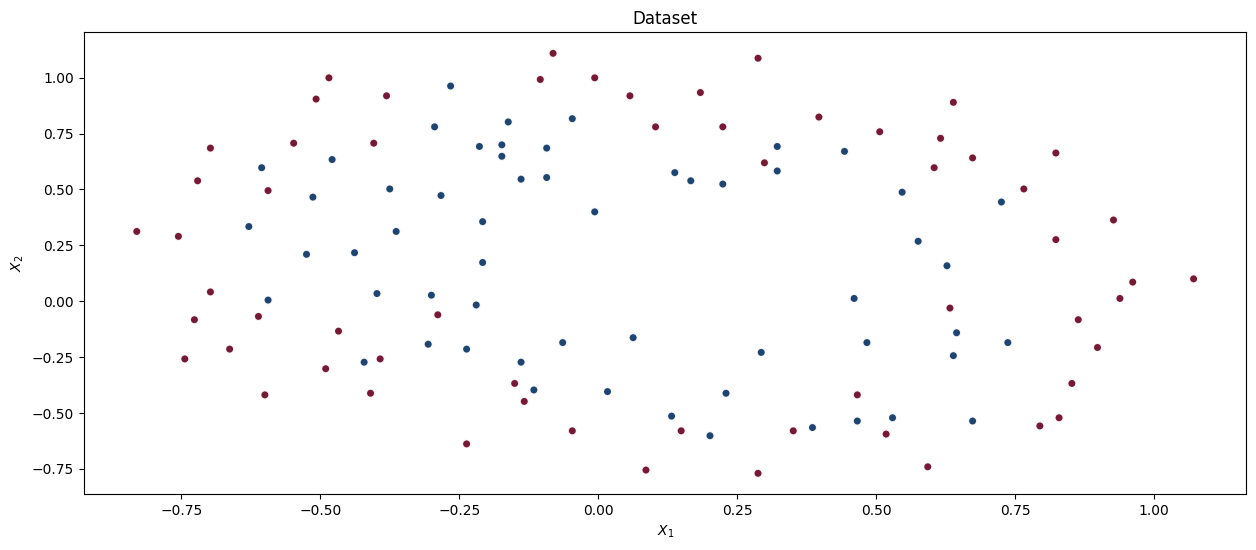

In [583]:
plt.figure(figsize=(15, 6))
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            cmap='RdBu',
            alpha=.9,
            ec='white')

plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')

plt.axis('on')
plt.show()

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

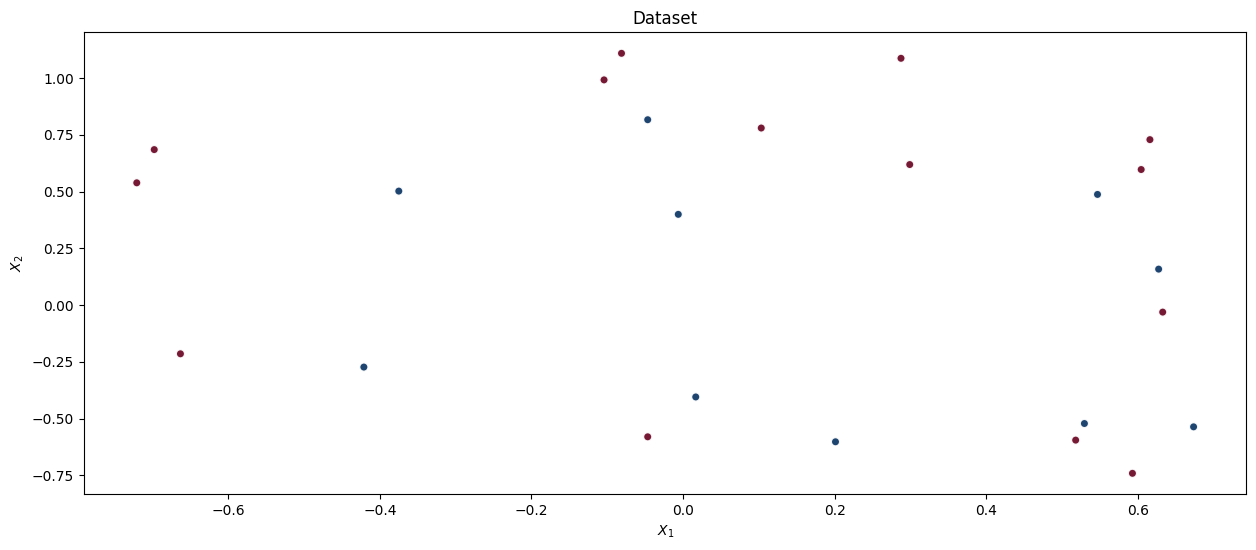

In [585]:
plt.figure(figsize=(15, 6))
plt.title('Dataset')
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test,
            cmap='RdBu',
            alpha=.9,
            ec='white')

plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')

plt.axis('on')
plt.show()

In [586]:
learning_rate = 0.1
epochs = 1000
threshold = 0.5
fnum = X.shape[1]

In [587]:
model = LogisticRegression(learning_rate, epochs, threshold, fnum)
model.fit(X_train, y_train)


In [588]:
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.42


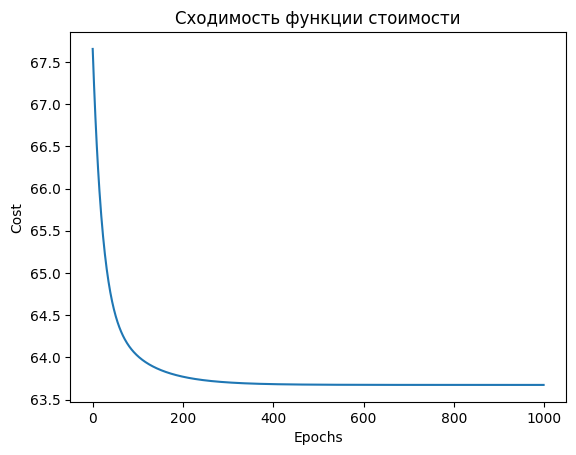

In [589]:
plt.plot(range(model.epochs), model.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Сходимость функции стоимости')
plt.show()

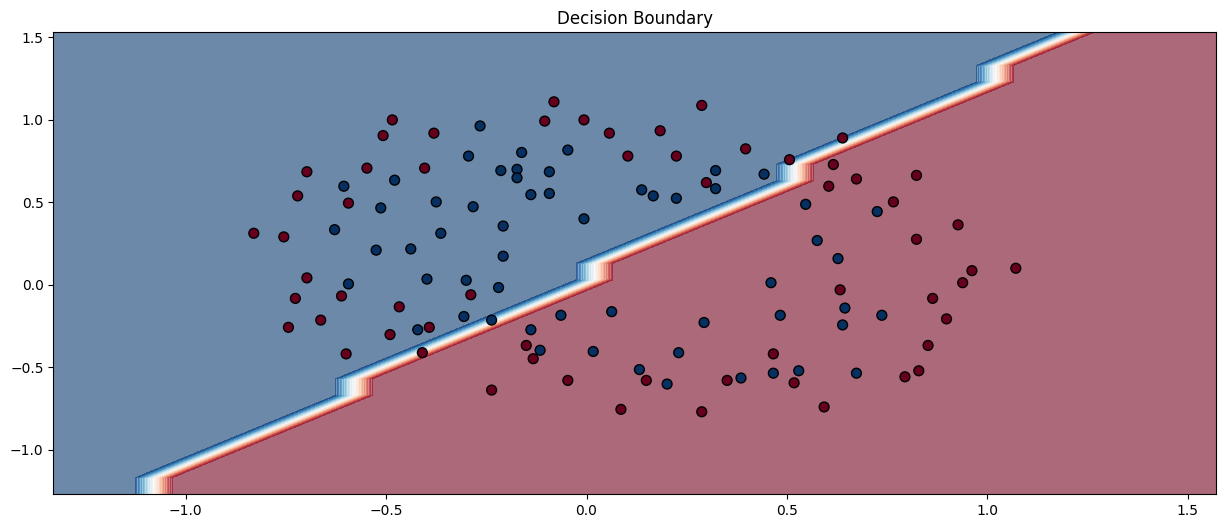

In [590]:
plot_decision_boundary(model, X, y)

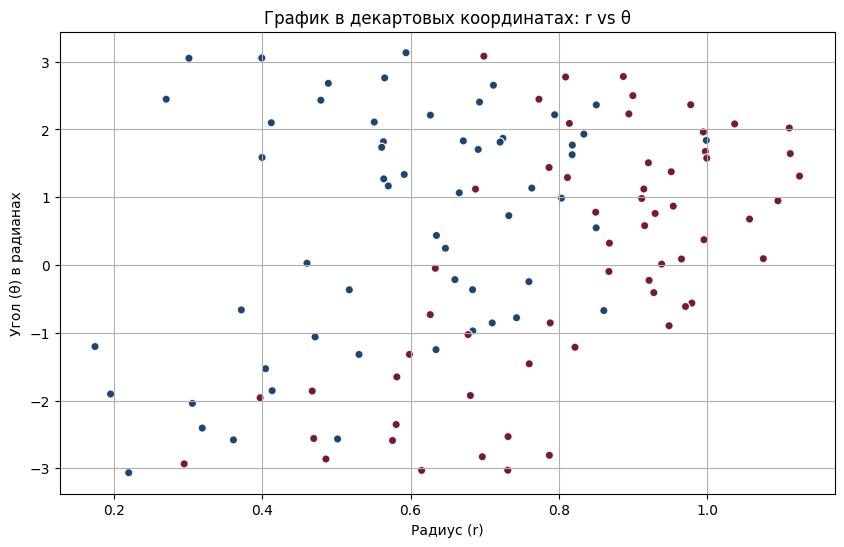

In [591]:
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
theta = np.arctan2(X[:, 1], X[:, 0])

plt.figure(figsize=(10, 6))
plt.scatter(r, theta, c=y, cmap='RdBu', alpha=0.9, edgecolor='white')
plt.title("График в декартовых координатах: r vs θ")
plt.xlabel('Радиус (r)')
plt.ylabel('Угол (θ) в радианах')

plt.grid(True)
plt.show()


In [592]:
X_pollar = np.column_stack((r, theta))
X_train_pollar, X_test_pollar, y_train_pollar,  y_test_pollar = train_test_split(X_pollar, y, test_size=0.2, random_state=0)

model.fit(X_train_pollar, y_train_pollar)
y_pred_pollar = model.predict(X_test_pollar)
accuracy = np.sum(y_pred_pollar == y_test_pollar) / len(y_test_pollar)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.71


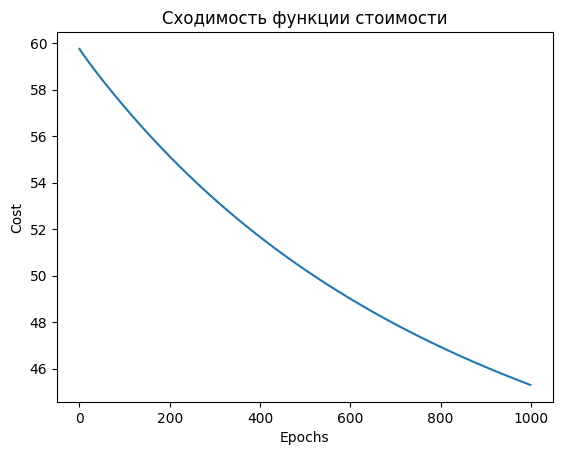

In [593]:
plt.plot(range(model.epochs), model.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Сходимость функции стоимости')
plt.show()

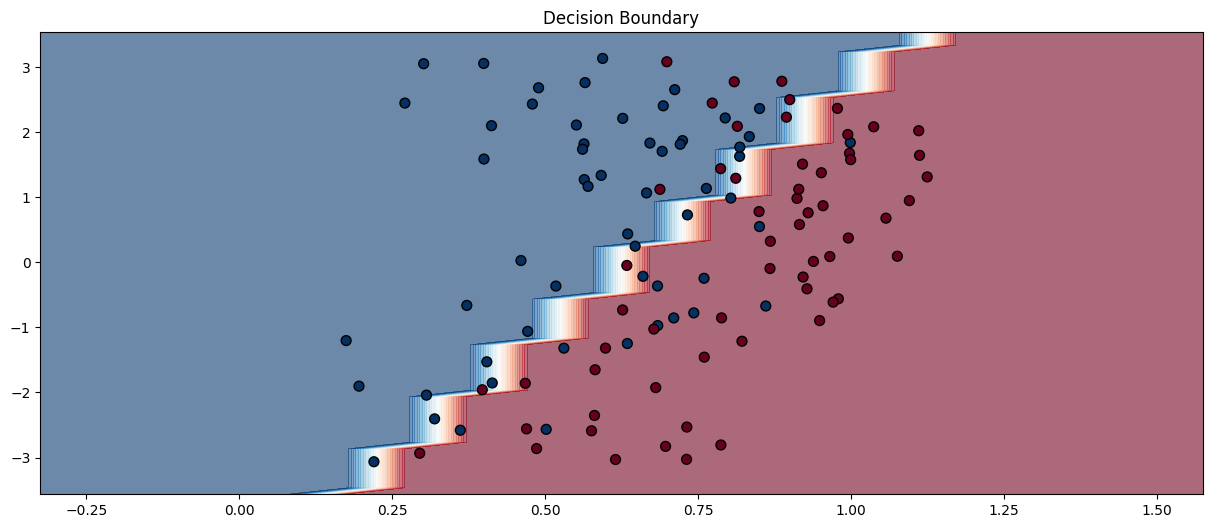

In [594]:
plot_decision_boundary(model, X_pollar, y)

In [595]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum( (x1 - x2)**2 ))

In [596]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)


    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_closest = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_closest]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [597]:
knn_model = KNN(k=7)
knn_model.fit(X_train, y_train)
outputs = knn_model.predict(X_test)

acc = np.sum(outputs == y_test) / len(y_test)
print(acc)

0.75


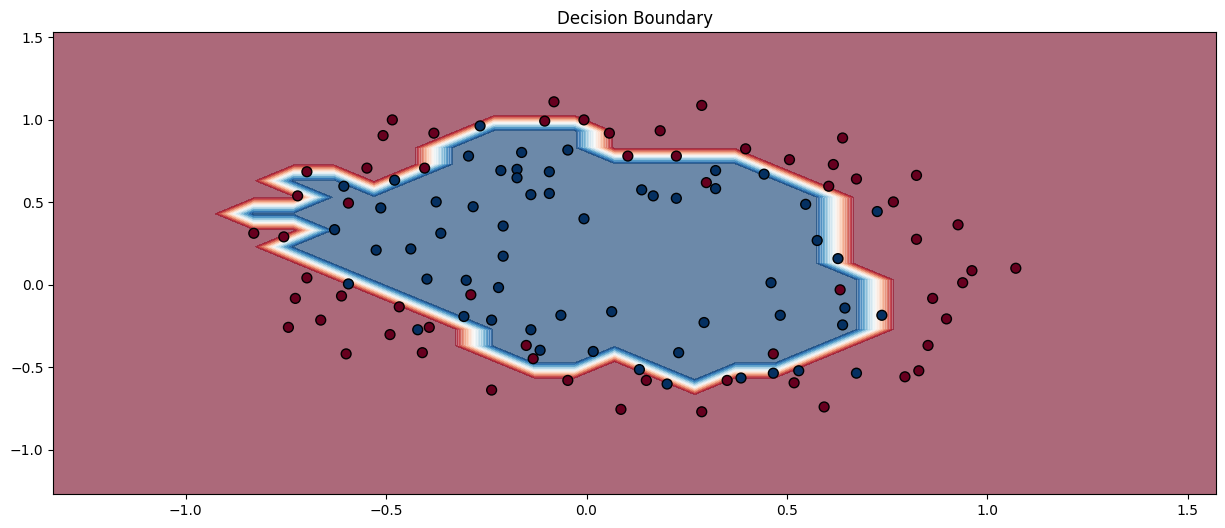

In [598]:
plot_decision_boundary(knn_model, X, y)

In [599]:
file_path = 'dataset/data2.txt'
data = pd.read_csv(file_path, sep=' ', header=None)

In [600]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

In [601]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

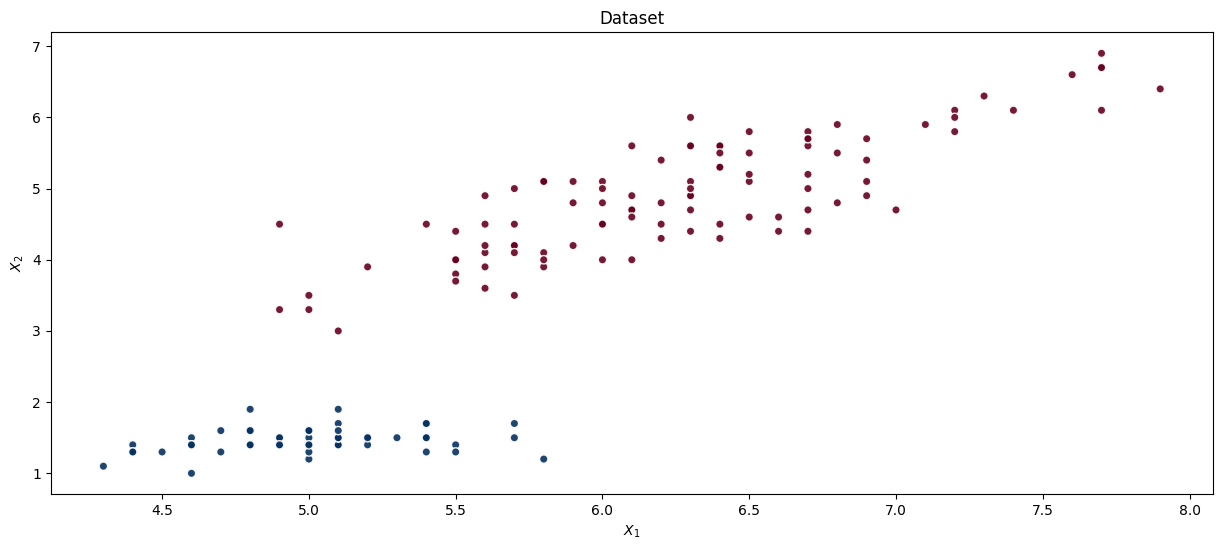

In [602]:
plt.figure(figsize=(15, 6))
plt.title('Dataset')
plt.scatter(X[:, 0], X[:, 2],
            c=y,
            cmap='RdBu',
            alpha=.9,
            ec='white')

plt.xlabel(r'$X_{1}$')
plt.ylabel(r'$X_{2}$')

plt.axis('on')
plt.show()

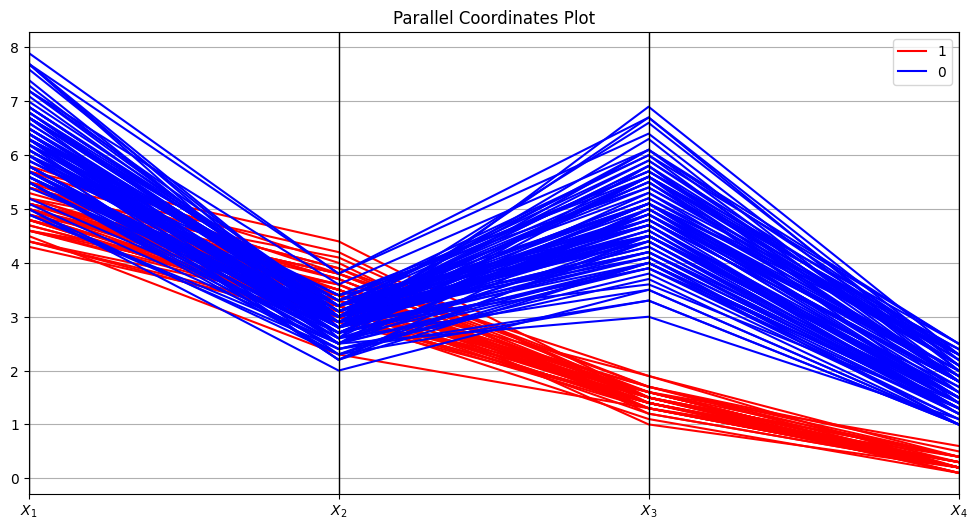

In [603]:
data = pd.DataFrame(X, columns=[r'$X_{1}$', r'$X_{2}$', r'$X_{3}$', r'$X_{4}$'])
data["Target"] = y

# Построение параллельных координат
plt.figure(figsize=(12, 6))
parallel_coordinates(data, "Target", color=('red', 'blue'))
plt.title("Parallel Coordinates Plot")
plt.show()

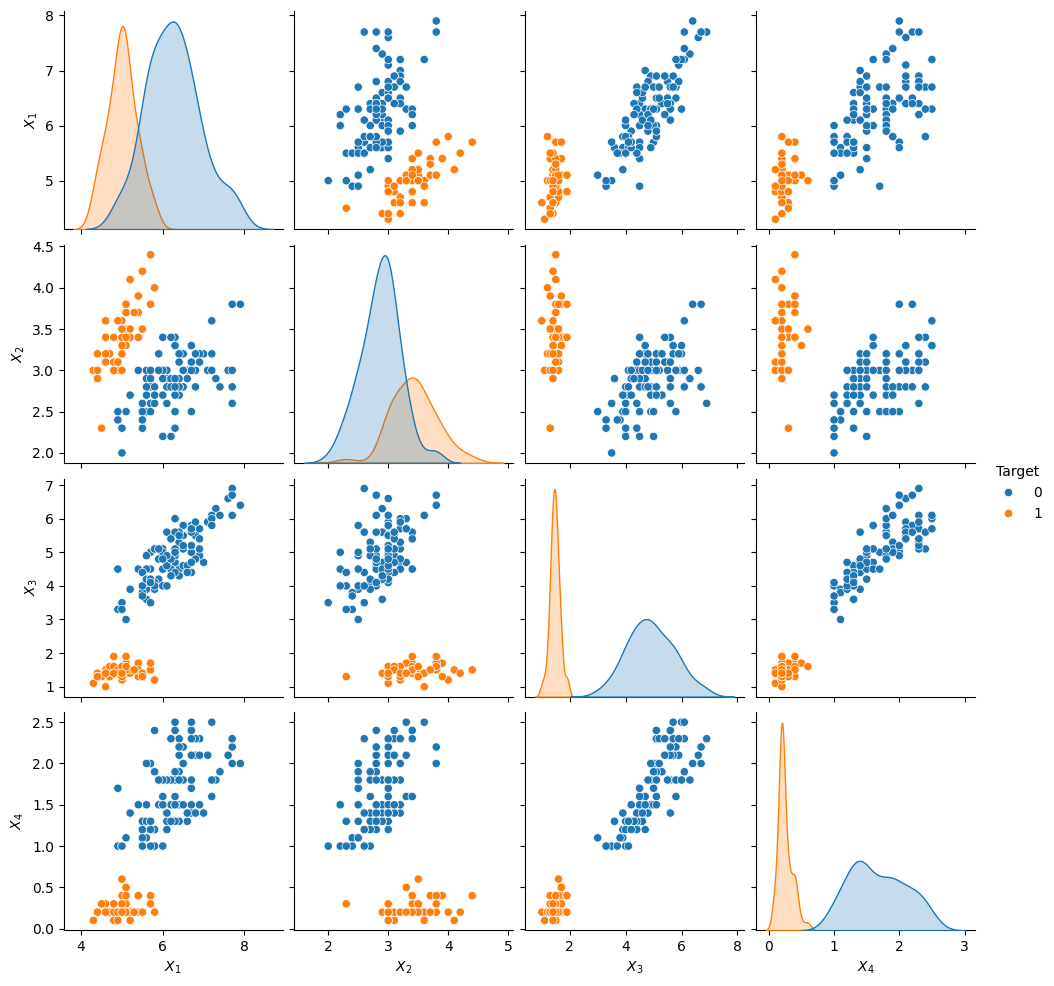

In [604]:
data = pd.DataFrame(X, columns=[r'$X_{1}$', r'$X_{2}$', r'$X_{3}$', r'$X_{4}$'])
data["Target"] = y

sns.pairplot(data, hue="Target", diag_kind="kde")
plt.show()

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [606]:
learning_rate = 0.1
epochs = 1000
threshold = 0.5
fnum = X.shape[1]

In [607]:
model = LogisticRegression(learning_rate, epochs, threshold, fnum)
model.fit(X_train, y_train)

In [608]:
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 1.00


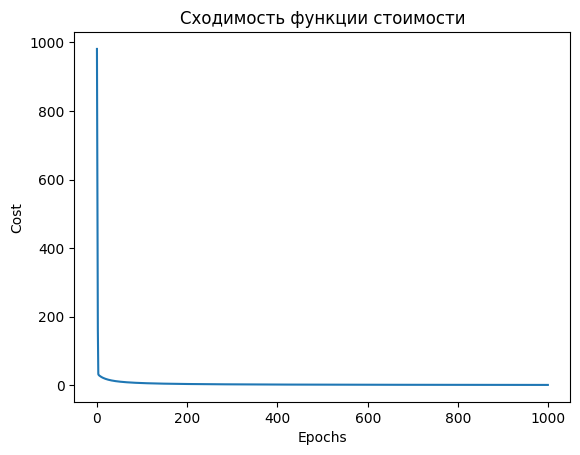

In [609]:
plt.plot(range(model.epochs), model.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Сходимость функции стоимости')
plt.show()